# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

<h1>План урока<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1">Масштабирование признаков</a></span><ul class="toc-item"><li><span><a href="#Нормализация-[0,-1]" data-toc-modified-id="Нормализация-[0,-1]-1.1">Нормализация [0, 1]</a></span></li><li><span><a href="#Стандартизация" data-toc-modified-id="Стандартизация-1.2">Стандартизация</a></span></li></ul></li><li><span><a href="#Стохастический-градиентный-спуск-(Stochastic-Gradient-Descent,-SGD)" data-toc-modified-id="Стохастический-градиентный-спуск-(Stochastic-Gradient-Descent,-SGD)-2">Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)</a></span></li><li><span><a href="#Регуляризация" data-toc-modified-id="Регуляризация-3">Регуляризация</a></span><ul class="toc-item"><li><span><a href="#L1-регуляризация---Lasso" data-toc-modified-id="L1-регуляризация---Lasso-3.1">L1 регуляризация - Lasso</a></span></li><li><span><a href="#L2-регуляризация---Ridge" data-toc-modified-id="L2-регуляризация---Ridge-3.2">L2 регуляризация - Ridge</a></span></li></ul></li><li><span><a href="#Домашние-задания" data-toc-modified-id="Домашние-задания-4">Домашние задания</a></span></li></ul></div>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

## Масштабирование признаков

In [5]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]]).T  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [6]:
# веса по МНК
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([3.98828270e+01, 2.18657683e+00, 2.94591674e-03, 5.27047320e+00])

In [7]:
X_1 = [1, 1, 1000, 1]
X_2 = [1, 1, 2000, 1]
X_1 @ w, X_2 @ w

(50.28579374158563, 53.23171047724945)

### Нормализация [0, 1]

In [13]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [14]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [15]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

$$x_{ij} = \frac{x_{ij} - min_{j} (x_{ij})}{max_{j} (x_{ij})-min_{j} (x_{ij})}$$

In [16]:
X_norm[:, 1] = (X[:, 1] - X[:, 1].min()) / (X[:, 1].max() - X[:, 1].min())
X_norm[:, 1]

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [17]:
X_norm[:, 2] = (X[:, 2] - X[:, 2].min()) / (X[:, 2].max() - X[:, 2].min())
X_norm[:, 2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

### Стандартизация

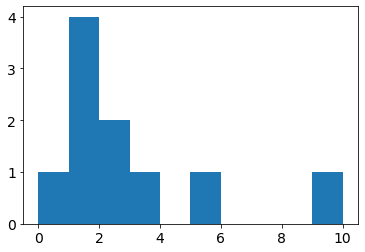

In [18]:
plt.hist(X[:, 1]);

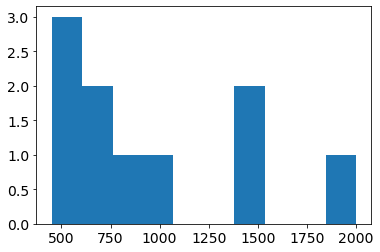

In [19]:
plt.hist(X[:, 2]);

$$s_{ij}=\frac{x_{ij} - \mu_{j}}{\sigma_{j}}$$

In [20]:
X_st = X.copy().astype(np.float64)

X_st[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_st[:, 1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [21]:
X_st[:, 1].mean(), X_st[:, 1].std()

(3.3306690738754695e-17, 1.0)

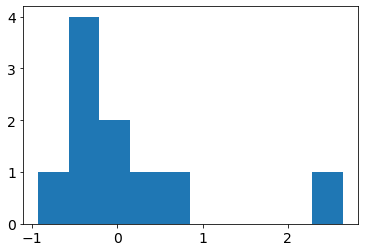

In [22]:
plt.hist(X_st[:, 1]);

In [23]:
def calc_std_feat(x):
    s = (x - x.mean()) / x.std()
    return s

In [25]:
X_st[:, 2] = calc_std_feat(X[:, 2])
X_st[:, 3] = calc_std_feat(X[:, 3])
print(X_st[:, 2])
print(X_st[:, 3])

[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


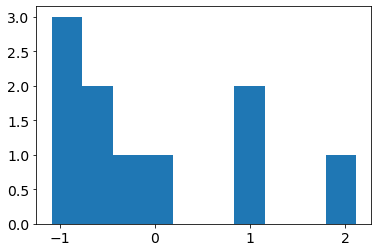

In [26]:
plt.hist(X_st[:, 2]);

## Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)

In [27]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [28]:
np.linalg.inv(X_st.T @ X_st) @ X_st.T @ y

array([57.4       ,  6.12241513,  1.42846588,  4.11637116])

In [30]:
w_sq_st = np.linalg.inv(X_st.T @ X_st) @ X_st.T @ y
y_pred = np.dot(X_st, w_sq_st)
err_sq = calc_mse(y, y_pred)
print(f'MSE для МНК для данных после стандартизации \t- {err_sq}\n')

w_sq = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = np.dot(X, w_sq)
err = calc_mse(y, y_pred)
print(f'MSE для МНК для данных БЕЗ стандартизации \t- {err}\n')

w_gd_st = eval_GD(X_st, y, iterations=1500, alpha=1e-2)
y_pred = np.dot(X_st, w_gd_st)
err_st = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска для данных после стандартизации - {err_st}\n')

# Градиентный спуск на данных без стандартизации не сходится! 
w_gd = eval_GD(X, y, iterations=1500, alpha=1e-2)
y_pred = np.dot(X, w_gd)
err_gd = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска для данных БЕЗ стандартизации - {err_gd}\n')

MSE для МНК для данных после стандартизации 	- 39.77774603555834

MSE для МНК для данных БЕЗ стандартизации 	- 39.77774603555834

150 [54.6517977   3.93619295  3.32277184  4.38532407] 48.50975036735786
300 [57.26727276  4.55529967  2.89027948  4.20488959] 40.2568881963691
450 [57.3935898   4.99245761  2.55431791  4.1072208 ] 40.02700920102978
600 [57.39969041  5.30327372  2.29437853  4.05919065] 39.91468961744934
750 [57.39998505  5.52555085  2.09368278  4.03988293] 39.85398827258408
900 [57.39999928  5.6854157   1.93900185  4.03650044] 39.82064430860322
1050 [57.39999997  5.80102512  1.81996261  4.04134839] 39.802085128581524
1200 [57.4         5.8850695   1.72846716  4.0499101 ] 39.79164482320061
1350 [57.4         5.94647036  1.65821673  4.05962582] 39.78572228821724
1500 [57.4         5.99153676  1.60432664  4.06912267] 39.782340657728625
MSE для метода градиентного спуска для данных после стандартизации - 39.78232384079615

150 [nan nan nan nan] nan
300 [nan nan nan nan] nan
450 [

C:\Users\User\Anaconda3\envs\py37_64\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
C:\Users\User\Anaconda3\envs\py37_64\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


**Стохастический градиентный спуск и mini-batch градиентный спуск**

На каждом шаге итерации градиентный спуск вычисляет градиенты для всего обучающего набора, стохастический градиентный спуск вычисляет градиент для одного объекта, а mini-batch градиентный спуск будет случайно отбирать небольшой набор данных (batch) и по ним вычислять градиент.

In [31]:
# SGD - есть код в методичке
def eval_SGD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    for i in range(1, iterations + 1):
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        err = calc_mse(y[ind], y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y[ind]), X[ind]))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [32]:
# mini-batch GD
def eval_mbGD(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [33]:
%%time

eval_GD(X_st, y, iterations=1000, alpha=1e-3) # 73.8595179617141

100 [10.82085913  1.29195795  1.98348488  2.85162983] 2248.0687649833903
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.2342373891092
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.3117228222376
400 [31.85217926  2.97593535  3.36731266  4.25691776] 697.4953996732182
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.53723685247013
600 [40.28164149  3.33210452  3.52533114  4.4424407 ] 335.3786903208636
700 [43.38747997  3.44044741  3.53692186  4.46912965] 238.17499151935831
800 [45.92981625  3.52666784  3.52816434  4.4759573 ] 173.0530720840704
900 [48.01088834  3.59963079  3.50798339  4.47169216] 129.4114395039912
1000 [49.71438487  3.66443755  3.48149699  4.4613567 ] 100.15781666892349
Wall time: 80.9 ms


array([49.71438487,  3.66443755,  3.48149699,  4.4613567 ])

In [34]:
%%time

eval_mbGD(X_st, y, iterations=1000, qty_in_batch=10, alpha=1e-3) 

100 [10.82085913  1.29195795  1.98348488  2.85162983] 2248.0687649833903
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.2342373891092
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.3117228222376
400 [31.85217926  2.97593535  3.36731266  4.25691776] 697.4953996732182
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.53723685247013
600 [40.28164149  3.33210452  3.52533114  4.4424407 ] 335.3786903208636
700 [43.38747997  3.44044741  3.53692186  4.46912965] 238.17499151935831
800 [45.92981625  3.52666784  3.52816434  4.4759573 ] 173.0530720840704
900 [48.01088834  3.59963079  3.50798339  4.47169216] 129.4114395039912
1000 [49.71438487  3.66443755  3.48149699  4.4613567 ] 100.15781666892349
Wall time: 93.9 ms


array([49.71438487,  3.66443755,  3.48149699,  4.4613567 ])

In [44]:
%%time

eval_SGD(X_st, y, iterations=1000, alpha=1e-2) # 73.8595179617141

100 [11.09673045  2.76640986  3.09785138  4.05453675] 2706.0794566603163
200 [19.40970234  2.86400447  3.09542826  4.41261566] 550.0364318088131
300 [26.17509739  3.11438104  2.58040039  4.09774734] 1185.0633769314857
400 [31.81702081  3.52542922  3.12340955  4.91301949] 775.6811161394052
500 [36.60993144  3.44836722  3.08448844  5.056057  ] 989.0457014886302
600 [40.30217517  3.07591389  2.79879237  4.97630842] 95.48638150414608
700 [43.25459714  3.16236038  3.0582185   5.02397079] 0.0840954816010883
800 [45.76168692  3.39544823  3.18838517  5.19073598] 164.82502890640126
900 [47.76897074  3.42737814  3.03692328  4.92938277] 237.3261812888926
1000 [49.48646635  3.6879653   3.15768445  4.99102713] 347.3714437649453
Wall time: 103 ms


array([49.48646635,  3.6879653 ,  3.15768445,  4.99102713])

## Регуляризация

### L1 регуляризация - Lasso

$$\sum^{n}_{i=1}L_i(\vec{x}_i,{y_i},\vec{w}) + \lambda \sum^{m}_{j=1}|w_{j}| \rightarrow \underset{w}{\text{min}}$$

### L2 регуляризация - Ridge

$$\sum^{n}_{i=1}L_i(\vec{x}_i,y_i,\vec{w}) + \lambda \sum^{m}_{j=1}w_{j}^{2} \rightarrow \underset{w}{\text{min}}$$

In [36]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [40]:
eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=0.01)

100 [10.81006867  1.29122651  1.98130134  2.84772322] 2249.125578533145
200 [19.23533693  2.13823131  2.72817064  3.5952512 ] 1513.0904130333497
300 [26.11817461  2.65090007  3.13929801  4.0126225 ] 1026.8331705255305
400 [31.74095754  2.97137766  3.35843706  4.24129552] 703.2334382998409
500 [36.33436645  3.18109496  3.46791612  4.36227606] 486.98959684737645
600 [40.08685088  3.32670894  3.51488282  4.42194665] 342.1037824193428
700 [43.15236054  3.43495955  3.52633542  4.44686001] 244.83138756628873
800 [45.65666127  3.52117901  3.51773188  4.45221195] 179.40210498794517
900 [47.70249469  3.59416539  3.49792063  4.44669406] 135.30356644617316
1000 [49.37379334  3.6589739   3.47196461  4.43527309] 105.51373341037743


array([49.37379334,  3.6589739 ,  3.47196461,  4.43527309])

без регуляризации веса: [49.71438487,  3.66443755,  3.48149699,  4.4613567 ]

## Домашние задания

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и либо стохастического градиентного спуска, либо mini-batch градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

2. Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.  
3. [\*] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.
4. [\*] Построить график изменения весов от числа итераций при GD и SGD (или mbGD) на одном рисунке.
5. [\*] Построить график изменения весов для L1 и L2 регуляризации от коэффициента регуляризации.

In [ ]:
from sklearn import datasets

X, y, coef = datasets.make_regression(n_samples=100, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

Методичка https://colab.research.google.com/drive/1nEC_D2y-maMuvbN-5iYFAjzLUw0eGOir